# Problem 2

### Linear fit

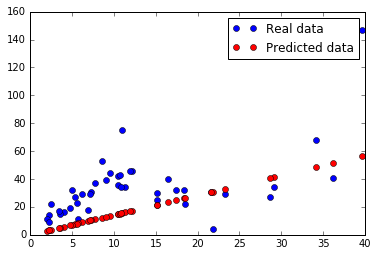

In [42]:
"""
Linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.0000001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(500): # train the model 500 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		#print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, b_value = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'ro', label='Predicted data')
plt.legend()
plt.show()

### Quad fit

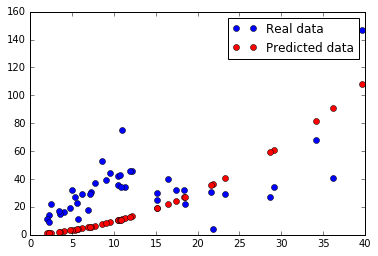

In [38]:
"""
Quadratic regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights_1')
u = tf.Variable(0.0, name='weights_2')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * X * w + X * u + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.0000001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./quad_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(500): # train the model 500 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		#print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, u_value, b_value = sess.run([w, u, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * X * w_value + X * u_value + b_value, 'ro', label='Predicted data')
plt.legend()
plt.show()

## Cubic fit

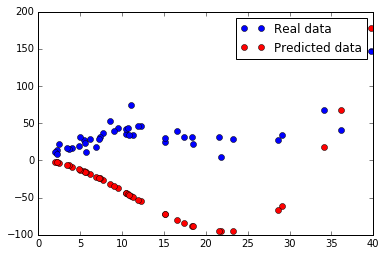

In [41]:
""""
Cubic regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights_1')
v = tf.Variable(0.0, name='weights_2')
u = tf.Variable(0.0, name='weights_2')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * X * X  * w + X * X * v + X * u + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.000000001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./cubic_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(500): # train the model 500 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		#print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, v_value, u_value, b_value = sess.run([w, v, u, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * X * X * w_value + X * X * v_value + X * u_value + b_value, 'ro', label='Predicted data')
plt.legend()
plt.show()